In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/work/SarahHvidAndersen#6681/DataScience_project/data/cybersecurity_attacks.csv')
df.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')

In [6]:
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


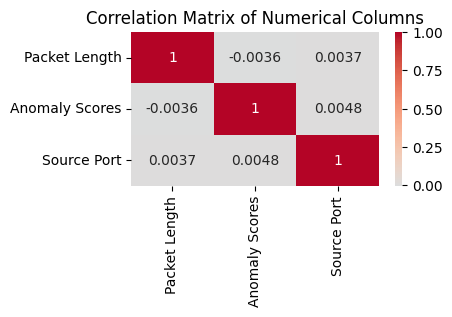

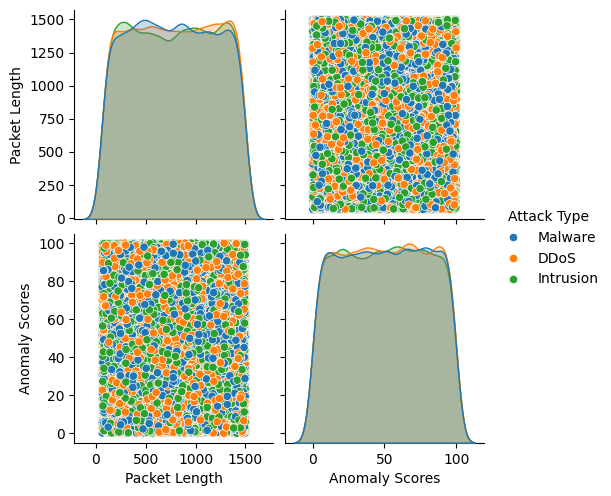

In [16]:
# Create a correlation matrix of numerical columns
correlation_matrix = df[['Packet Length', 'Anomaly Scores', 'Source Port']].corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

# Optional: Explore the relationships with pair plots
sns.pairplot(df[['Packet Length', 'Anomaly Scores', 'Severity Level', 'Attack Type']], hue='Attack Type')
plt.show()

Frequency counts for Protocol:
Protocol
ICMP    13429
UDP     13299
TCP     13272
Name: count, dtype: int64


Frequency counts for Packet Type:
Packet Type
Control    20237
Data       19763
Name: count, dtype: int64


Frequency counts for Traffic Type:
Traffic Type
DNS     13376
HTTP    13360
FTP     13264
Name: count, dtype: int64


Frequency counts for Malware Indicators:
Malware Indicators
IoC Detected    20000
Name: count, dtype: int64


Frequency counts for Alerts/Warnings:
Alerts/Warnings
Alert Triggered    19933
Name: count, dtype: int64


Frequency counts for Attack Type:
Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64


Frequency counts for Action Taken:
Action Taken
Blocked    13529
Ignored    13276
Logged     13195
Name: count, dtype: int64


Frequency counts for User Information:
User Information
Heer Lad            6
Ishaan Chaudhari    6
Vritika Dara        5
Tara Madan          5
Nakul Krishna       5
                   ..
T

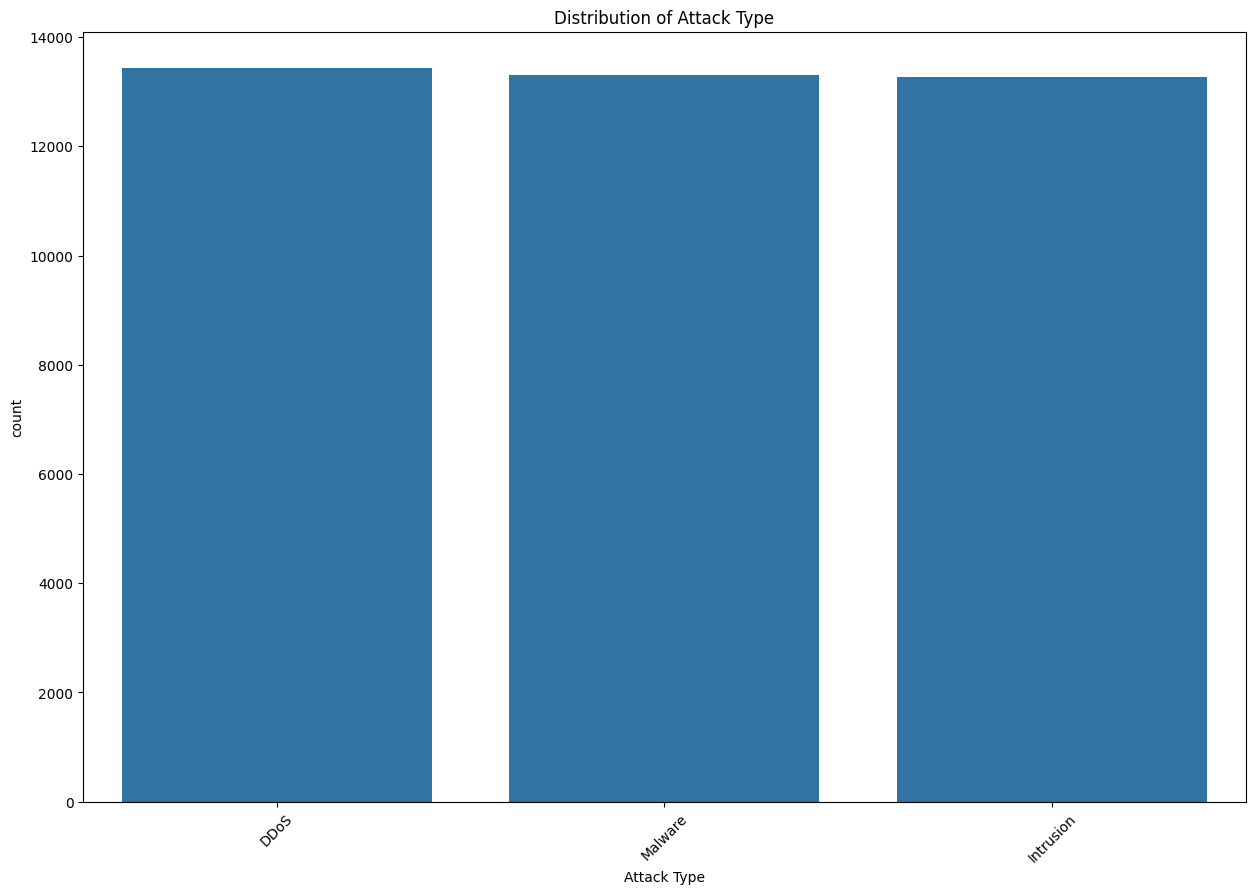

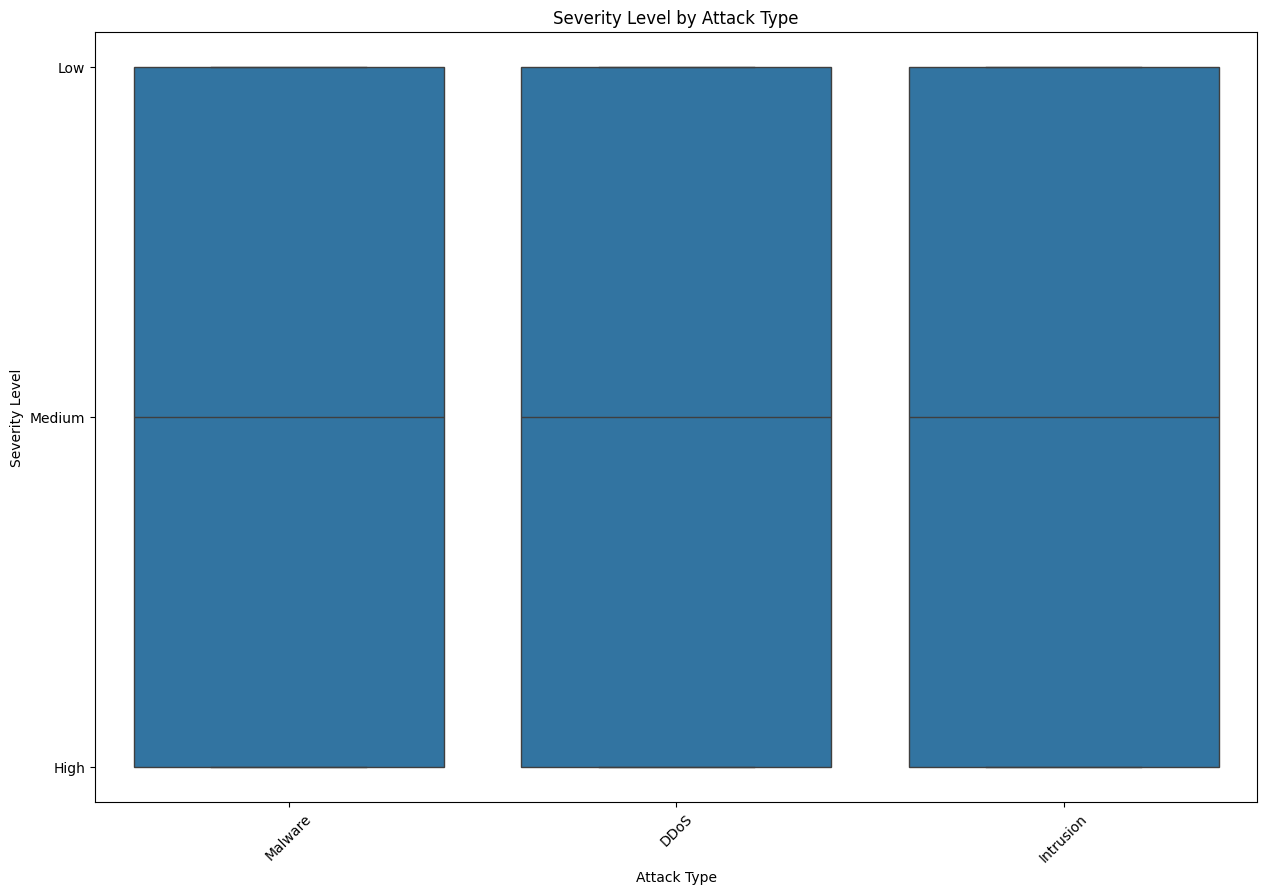

In [17]:

# List of categorical columns (modify based on your actual dataset)
categorical_columns = ['Protocol', 'Packet Type', 'Traffic Type', 'Malware Indicators', 'Alerts/Warnings', 
                       'Attack Type', 'Action Taken', 'User Information', 'Device Information', 
                       'Network Segment', 'Geo-location Data', 'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source']

# Frequency counts
for col in categorical_columns:
    print(f"Frequency counts for {col}:")
    print(df[col].value_counts())
    print("\n")

# Cross-tabulation (example between Attack Type and Traffic Type)
cross_tab = pd.crosstab(df['Attack Type'], df['Traffic Type'])
print("Cross Tabulation between 'Attack Type' and 'Traffic Type':\n", cross_tab)

# Count plot for categorical columns
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='Attack Type', order=df['Attack Type'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Attack Type')
plt.show()

# Box plot/Violin plot for categorical vs numerical columns (example with Attack Type and Severity Level)
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x='Attack Type', y='Severity Level')
plt.xticks(rotation=45)
plt.title('Severity Level by Attack Type')
plt.show()


Cross Tabulation between 'Attack Type' and 'network Type':
 Network Segment  Segment A  Segment B  Segment C
Attack Type                                     
DDoS                  4445       4466       4517
Intrusion             4349       4497       4419
Malware               4479       4356       4472


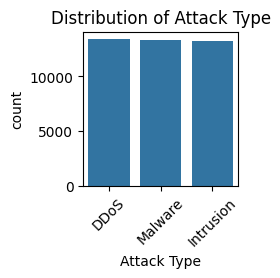

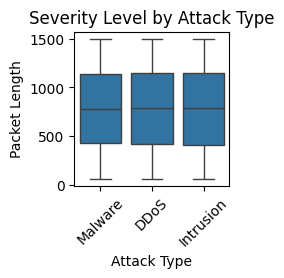

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with your actual file path)
# df = pd.read_csv('your_dataset.csv')

# Cross-tabulation (example between Attack Type and Traffic Type)
cross_tab = pd.crosstab(df['Attack Type'], df['Network Segment'])
print("Cross Tabulation between 'Attack Type' and 'network Type':\n", cross_tab)

# Count plot for categorical columns
plt.figure(figsize=(2, 2))
sns.countplot(data=df, x='Attack Type', order=df['Attack Type'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Attack Type')
plt.show()

# Box plot/Violin plot for categorical vs numerical columns (example with Attack Type and Severity Level)
plt.figure(figsize=(2, 2))
sns.boxplot(data=df, x='Attack Type', y='Packet Length')
plt.xticks(rotation=45)
plt.title('Severity Level by Attack Type')
plt.show()


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import classification_report

# Columns that should be excluded because they could give away the answer
excluded_columns = ['Attack Type', 'Timestamp', 'Source IP Address', 'Destination IP Address', 
                    'Source Port', 'Destination Port', 'Attack Signature', 'Log Source']

# Selecting features (all except the excluded ones)
feature_columns = [col for col in df.columns if col not in excluded_columns]
X = df[feature_columns]

# Encoding categorical features using LabelEncoder for simplicity
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))

# Target variable
y = df['Attack Type']

# Encoding target variable
y_encoded = LabelEncoder().fit_transform(y)

# Splitting data into train (60%), eval (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y_encoded, test_size=0.4, random_state=42)
X_eval, X_test, y_eval, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# XGBoost model training
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train, eval_set=[(X_eval, y_eval)], early_stopping_rounds=10)

# Evaluation on the test set
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=LabelEncoder().fit(y).classes_))


[0]	validation_0-mlogloss:1.09905
[1]	validation_0-mlogloss:1.09983
[2]	validation_0-mlogloss:1.10038
[3]	validation_0-mlogloss:1.10102
[4]	validation_0-mlogloss:1.10208
[5]	validation_0-mlogloss:1.10266
[6]	validation_0-mlogloss:1.10319
[7]	validation_0-mlogloss:1.10386
[8]	validation_0-mlogloss:1.10443
[9]	validation_0-mlogloss:1.10494
[10]	validation_0-mlogloss:1.10532
              precision    recall  f1-score   support

        DDoS       0.35      0.35      0.35      2623
   Intrusion       0.32      0.18      0.23      2664
     Malware       0.34      0.50      0.41      2713

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.33      8000
weighted avg       0.34      0.34      0.33      8000



/work/SarahHvidAndersen#6681/env/lib/python3.12/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


               Feature  Importance
6       Anomaly Scores    0.070244
4         Payload Data    0.069731
15   Proxy Information    0.068651
11    User Information    0.066841
10      Severity Level    0.066666
14   Geo-location Data    0.065922
1        Packet Length    0.065778
8     Attack Signature    0.064547
0             Protocol    0.064070
12  Device Information    0.063038
2          Packet Type    0.062328
13     Network Segment    0.059204
9         Action Taken    0.054985
3         Traffic Type    0.054459
16       Firewall Logs    0.052364
17      IDS/IPS Alerts    0.051172
7      Alerts/Warnings    0.000000
5   Malware Indicators    0.000000


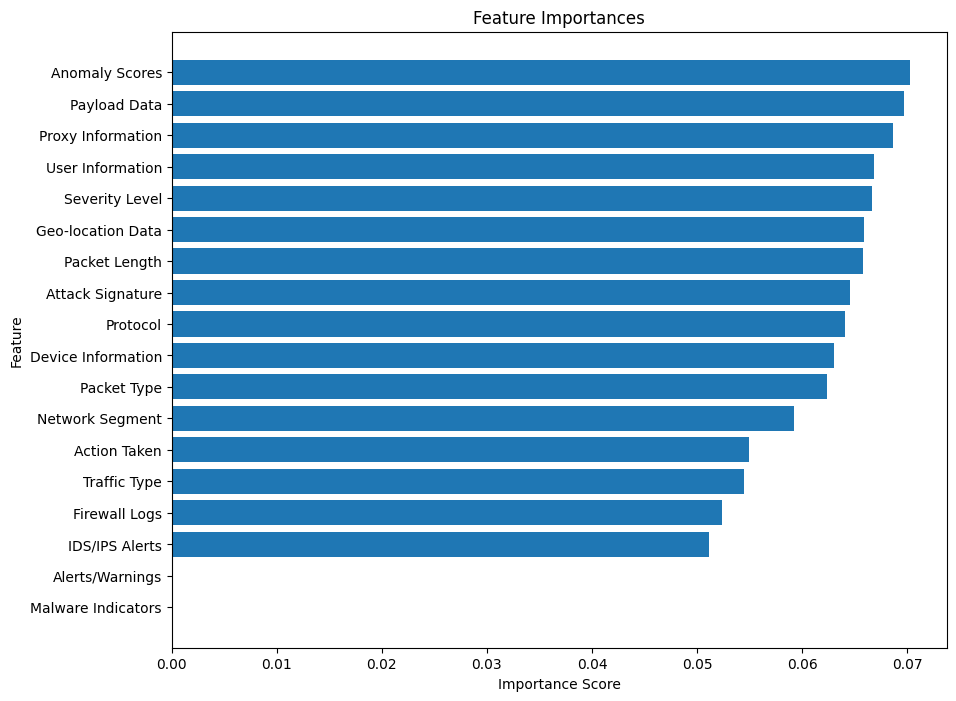

In [28]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = model.feature_importances_

# Map feature importance scores to feature names
importance_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': feature_importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()